In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0" # If you have more than one GPU, use this to select the one you want to use

from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import sys

sys.path.insert(0, "../packages/python")
from data import utils as data_utils
from data import augmentation as data_augmentation
from models import cell_segmentation as segmentators


# Cell Segmentation Examples

This notebook has some examples on how the ´CellMaskGenerator´ class (and its childs) work.

### Segment Anything Model (SAM)

Download checkpoint files here: https://pypi.org/project/segment-anything-py/#model-checkpoints

This models requieres 16 GB of RAM (or VRAM) to work.


In [2]:
# Location of the model, input data and output location, modify to your structure
SAM_CHECKPOINT_PATH = "/media/fast-bucket/models/SAM/sam_vit_h_4b8939.pth"
IMAGE_PATH = "../untracked/datasets/Abril2023/small_debug_dataset/input/"
OUTPUT = "../untracked/datasets/Abril2023/sam_out/"
CSV_PATH = os.path.join(OUTPUT, "sam_out_2.csv")

# Select the devicce: 
# "cuda" : Will use the NVIDIA GPU
# "cpu" : Will use the... CPU
DEVICE_USE = "cuda"

In [3]:
# Load Model
cmg = segmentators.SAMCellMaskGenerator(SAM_CHECKPOINT_PATH, model_type = 'vit_h', device = DEVICE_USE)


In [7]:
# Apply segmentation to the whole
CSV_PATH = os.path.join(OUTPUT, "sam_out_2.csv")
data_utils.dataset_cell_segmentation(cmg, IMAGE_PATH, )

In [9]:
# Read created data
data_df = pd.read_csv(CSV_PATH)

In [10]:
data_df.head()

,area,x,y,w,h,bbox_area,image,cell_id
0,73792,165,741,579,144,83376,332.png,0
1,55382,2004,0,424,153,64872,332.png,1
2,61648,2436,0,371,301,111671,332.png,2
3,69689,1608,1596,373,320,119360,332.png,3
4,68841,1847,140,438,188,82344,332.png,4


In [11]:
data_df.tail()

,area,x,y,w,h,bbox_area,image,cell_id
503,1315,1644,414,41,40,1640,331.png,111
504,832,1358,1559,33,31,1023,331.png,112
505,1694,1660,893,39,59,2301,331.png,113
506,2950,2483,380,66,58,3828,331.png,114
507,2123,1667,234,44,59,2596,331.png,115


### Tests...

I will remove this in the future

In [4]:
# All this should be (somehow) part of the "generate" method
# I'm leaving that unimplemented because this might not be the best way to do it.
# Also because the actual final mask is never created, "mask_gen_f" contains a per-instance mask.
import cv2 as cv
image_input = cv.imread(os.path.join(IMAGE_PATH, "331.png"))
image_input = cv.cvtColor(image_input, cv.COLOR_BGR2RGB)

mask_gen = cmg.mask_generator.generate(image_input)

mask_gen_f = cmg._filter_masks(mask_gen)

masks_df = cmg._masks_to_df(mask_gen_f, "test-image")

In [5]:
masks_df.head()

,area,x,y,w,h,bbox_area,image,cell_id
0,15288,2157,499,143,131,18733,test-image,0
1,18433,268,1277,180,172,30960,test-image,1
2,18478,330,1671,147,165,24255,test-image,2
3,21786,2788,1925,201,122,24522,test-image,3
4,23054,1778,1898,182,149,27118,test-image,4


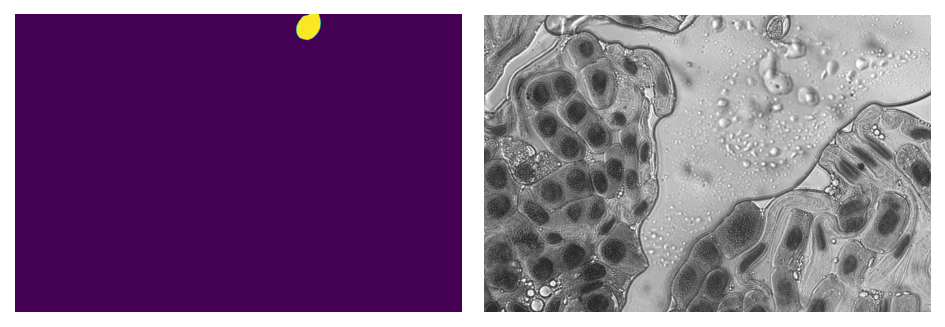

In [6]:
instance_show = 10
plt.figure(dpi=150)
plt.subplot(1,2,1)
plt.imshow(mask_gen_f[instance_show]["segmentation"])
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image_input)
plt.axis("off")
plt.tight_layout()
plt.show()
